# 3.03 Chord pattern and Timpani

* using Chord pattern lik in the versions 2.08 and 2.09
* adding a easy Drumm funktion controlling the volume.


In [1]:
from pyknon.genmidi import Midi
from pyknon.music import Rest, Note, NoteSeq
from music_generation import*
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
from datetime import date

## Transform Meteo data

In [2]:
def scale(a):    return (a-a.min())/(a.max()-a.min())

def read_meteo_data(fName):
    colNames = ['Stao','time', 'T_Boden_20cm', 'V_Windböe', 'T_Chill', 'Flash_30km', 'Glob_rad', 'QFE','T_2m','Flash_3km','Rain_Sum','Rain_intens','H_rel','visibi','V_wind','stabw_V_wind','direction_wind']  
    df = pd.read_csv(fName,sep=';', skiprows=3, names=colNames, na_values='-')
    print(df.head())
    return df

fPath = '/mnt/daten/04_Schule/42_Kanti/Matrua/Music_generation/Organisation/MeteoSchweiz/Daten/'
fName = 'order_74947_data.txt'
dM = read_meteo_data(fPath+fName)

#---- Parameter bestimmen -----------
NT, MP = dM.shape
print('-----------------')
print('NT, MP', NT, MP)



  Stao          time  T_Boden_20cm  V_Windböe  T_Chill  Flash_30km  Glob_rad  \
0  KLO  201908270000          20.4        1.2     14.2           0         2   
1  KLO  201908270010          20.4        0.9     14.4           0         2   
2  KLO  201908270020          20.4        1.1     14.4           0         1   
3  KLO  201908270030          20.4        0.8     13.8           0         2   
4  KLO  201908270040          20.4        0.5     14.2           0         2   

     QFE  T_2m  Flash_3km  Rain_Sum  Rain_intens  H_rel  visibi  V_wind  \
0  968.2  14.2          0       0.0          0.0   99.6  6626.0     0.7   
1  968.2  14.4          0       0.0          0.0   98.5  1277.0     0.5   
2  968.2  14.4          0       0.0          0.0   98.6  4900.0     0.5   
3  968.3  13.8          0       0.0          0.0   99.0  7417.0     0.6   
4  968.2  14.2          0       0.0          0.0   99.7   981.0     0.4   

   stabw_V_wind  direction_wind  
0             9             110  


__met_transform__
* the __rolling mean__ is to remove noise on the data. 
* the __factors__ are used to scale the melody, such that it plays in a certain range
* __start__ defins the staring point of the melodies by removing the begin of the data

__Chords and scales__

In [3]:
major = np.array([ 0, 2, 4, 5, 7, 9, 11])
minor = np.array([ 0, 2, 3, 5, 7, 8, 10])  
C7 = np.array([ 0, 4, 7, 10]) 
CM7 = np.array([ 0, 4, 7, 11])
Cm7 = np.array([ 0, 3, 7, 10])
Cm  = np.array([ 0, 3, 7])
Cdim   = np.array([ 0, 3, 6])
C   = np.array([ 0, 4, 7])
power= np.array([ 0, 7])
B= np.array([ 0])

## Tune_W 

* This tune uses the temperature and humidity
* With Bassoon and Clarinet
* Chord pattern Cm Ab Fm Ddim G7 Cm Fm G7

In [79]:
def tune_W():
    tune_name = 'tune_W'  
    np.random.seed(39)  #56
    bar, bpb = 15, 4  # bar: Takt , bpb: beat per bar
    melody_len = bar * bpb
    mpb = 120   #minutes per beat.
    start =10     # start in hours 

    trans = met_transform(dM,[1,1,1,1,0.5,1,0.38,1,1,1,0.1,1,4.5,1,1,],[6,6,6,6,6,6,6,6,6,6,6,6,6,6,2],start)
    
    #scales = [[1,CM7],[1,Cm7+9],[1,Cm7+2],[1,C7+7]] #rythem Change
    #scales = [[4,C7],[2,C7+5],[2,C7],[1,C7+7],[1,C7+5],[2,C7]] # Blues  
    scales = [[1,Cm],[1,C+8],[1,Cm+5],[1,Cdim+2],[1,C7+7],[1,Cm],[1,Cm+5],[1,C7+7]]
    #scales = [[8,major]]
    end_scale = [[1,Cm],[1,power]]
    pattern = pattern_gen(scales, end_scale, melody_len)

    # humidity
    range_1 = liniar_range(44,51,70,76)
    rythem1, notenr_1 = ran_duration([1/16,1/8, 1/4,1/2], [0,2,3,1], melody_len)
    melody1 = meteo_melody(trans[10],pattern, 60, range_1, notenr_1, rythem1,mpb)
    volumes1 = ran_volume([0,120], [1,8], notenr_1 )
    notes1 = NoteSeq( [Note(no,octave=0, dur=du, volume=vo) for no,du,vo in zip(melody1,rythem1,volumes1)] )
    
    # temperature
    range_2 = liniar_range(44,51,70,76)
    rythem2, notenr_2 = ran_duration([1/16,1/8, 1/4,1/2], [0,2,3,2], melody_len)
    melody2 = meteo_melody(trans[6],pattern, 66, range_2, notenr_2, rythem2,mpb)
    volumes2 = ran_volume([0,120], [1,8], notenr_2 )
    notes2 = NoteSeq( [Note(no,octave=0, dur=du, volume=vo) for no,du,vo in zip(melody2,rythem2,volumes2)] )

    instruments = [70,71]
    notes = [notes1,notes2]
    return notes, instruments,tune_name

## Tune_X

In [95]:
def tune_X():
    tune_name = 'tune_X'  
    #np.random.seed(56)
    bar, bpb = 13, 4  # bar: Takt , bpb: beat per bar
    melody_len = bar * bpb
    mpb = 60   #minutes per beat.
    start =276     # start in hours 

    trans = met_transform(dM,[1,1,1,1,1,4,0.8,1,500,1,0.2,1,4.5,4,1,],[6,6,6,6,6,6,6,6,6,6,6,6,6,6,2],start)
    #print(dM[dM.columns[8]])
    #plt.plot(trans[6,:300])
    #np.set_printoptions(threshold=np.inf)
    #print(trans[12,::20])
    
    
    #scales = [[1,CM7],[1,Cm7+9],[1,Cm7+2],[1,C7+7]] #rythem Change
    #scales = [[4,C7],[2,C7+5],[2,C7],[1,C7+7],[1,C7+5],[2,C7]] # Blues  
    scales = [[8,major]]
    end_scale = [[3,power]]
    pattern = pattern_gen(scales, end_scale, melody_len)

    # Pressure
    range_1 = liniar_range(44,51,70,76)
    rythem1, notenr_1 = ran_duration([1/32,1/8, 1/4,1/2], [0,2,3,1], melody_len)
    melody1 = meteo_melody(trans[5],pattern, 60, range_1, notenr_1, rythem1,mpb)
    volumes1 = ran_volume([0,100], [1,8], notenr_1 )
    notes1 = NoteSeq( [Note(no,octave=0, dur=du, volume=vo) for no,du,vo in zip(melody1,rythem1,volumes1)] )
    
    # temp
    range_2 = liniar_range(44,51,70,76)
    rythem2, notenr_2 = ran_duration([1/16,1/8, 1/4,1/2], [0,2,3,2], melody_len)
    melody2 = meteo_melody(trans[6],pattern, 65, range_2, notenr_2, rythem2,mpb)
    volumes2 = ran_volume([0,100], [1,8], notenr_2 )
    notes2 = NoteSeq( [Note(no,octave=0, dur=du, volume=vo) for no,du,vo in zip(melody2,rythem2,volumes2)] )
    
    #timpani rain
    melody3, rythem3, volumes3 = met_percus(trans[8], pattern, [72,73], 1/16, [50,120], melody_len, mpb)
    notes3 = NoteSeq( [Note(no,octave=0, dur=du, volume=vo) for no,du,vo in zip(melody3,rythem3,volumes3)] )
    

    
    #plot_range([range_1],['range_1'],tune_name)
    instruments = [70,61,47]
    notes = [notes1,notes2,notes3]
    return notes, instruments,tune_name

In [96]:
def met_percus(meteo, pattern, note,frequ,volume, melody_len, mpb):

    note_nr =  int(melody_len/(frequ*4))
    print(melody_len,mpb,note_nr)
    rythem = np.repeat(frequ,note_nr)
    melody = np.repeat(note,note_nr/len(note))
    volume = np.zeros(note_nr, dtype=int)
    
    for npn in range(note_nr):  #npn: note per note (index)      

        met_resolution = 10
        beat_nr = npn*frequ*4                                   #find beat nr
        i_met = np.round((beat_nr*mpb)/met_resolution).astype(int)  # calulate index of the data array
        vol = meteo[i_met]             # take the diffrence of the data
        vol = np.round(vol).astype(int)                       # round to an int
        volume[npn]= vol
    volume = np.where(volume > 127, 127, volume)


    return  melody, rythem, volume

    

__Instruments:__
Available are at lest the 128 General-Midi (GM) Instruments. Depending on the sound-fonts there is a bigger choise. A list of the GM instruments can be found here. https://jazz-soft.net/demo/GeneralMidi.html


## Generate Midi and Audio file

In [97]:
def gen_midi():
#     squezze into a MIDI framework
    notes, instruments, tune_name = tune_X() #  <--- select a tune  <<--     <<<<<<<<<--- select a tune -----
    nTracks = len(notes)
    
    m = Midi(number_tracks=nTracks, tempo=120, instrument=instruments)
    for iTrack in range(nTracks):
        m.seq_notes(notes[iTrack], track=iTrack)

    #--- write the MIDI file -----
    midi_file_name = tune_name +'.mid'   # set the name of the file
    m.write(midi_file_name)
    return midi_file_name

52 60 208


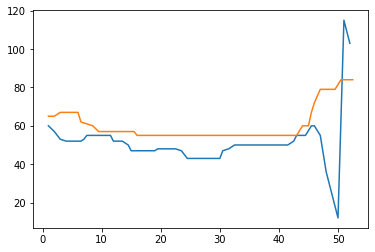

In [99]:
######---  Main  ---######
midi_file_name = gen_midi()

midi_play(midi_file_name)
midi_audio(midi_file_name)
midi_png(midi_file_name)


### External __Music_Generation__ library
This library changes from version to version. New or changed code is first explaind above. This is a copy of music_generation.py 